<a href="https://colab.research.google.com/github/jmn0/Planto/blob/main/Planto_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Specify the file path to your CSV file
file_path = 'D:/data_plant.csv'

# Read the CSV file with comma as the separator
df = pd.read_csv(file_path, sep=',')

In [ ]:
# Displaying the first few rows of the dataset
print(df.head())


    N   P   K  temperature  humidity   ph  rainfall Crops
0  90  42  43           21      82.0  6.5     202.9  rice
1  85  58  41           22      80.3  7.0     226.7  rice
2  60  55  44           23      82.3  7.8     264.0  rice
3  74  35  40           26      80.2  7.0     242.9  rice
4  78  42  42           20      81.6  7.6     262.7  rice


In [ ]:
print(df.columns)

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'Crops'], dtype='object')


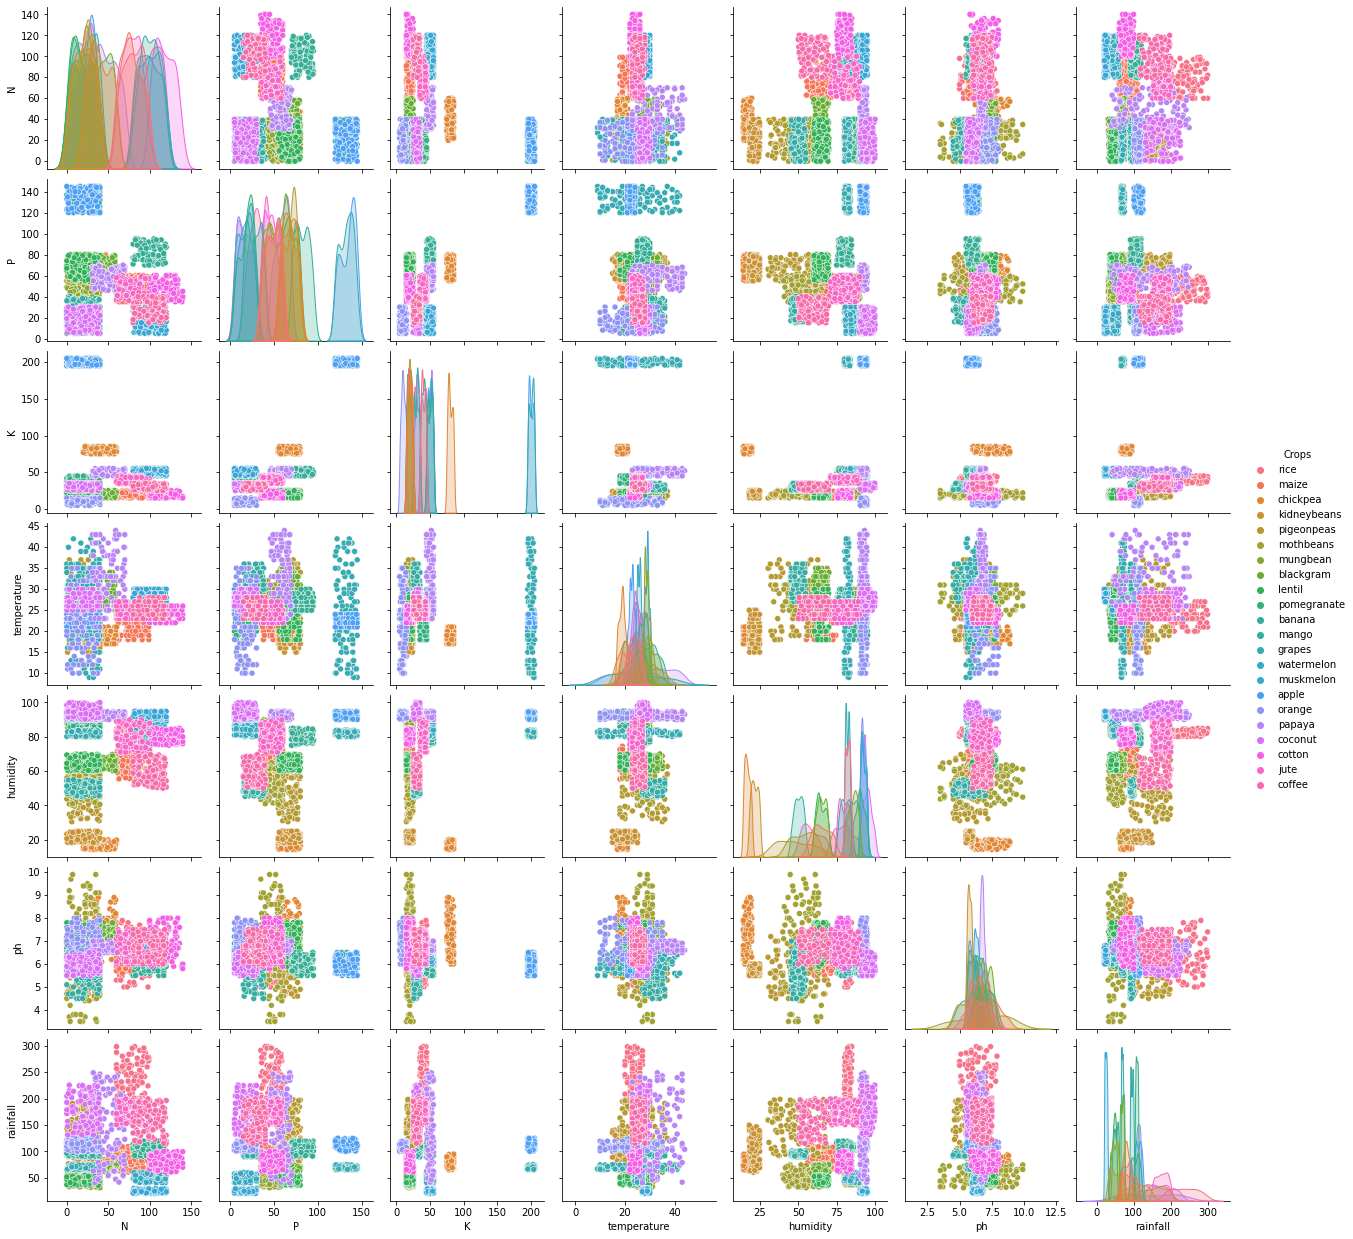

In [ ]:
sns.pairplot(df, hue='Crops')

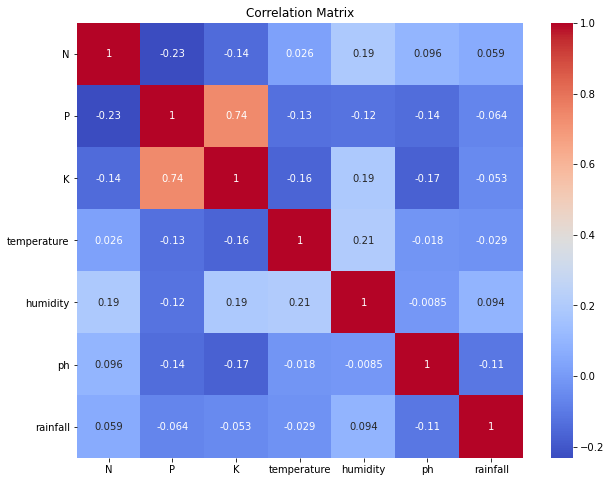

In [ ]:
# Correlation matrix to quantify relationships
correlation_matrix = df.corr()

# Heatmap visualization of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Positive Correlations (Close to 1):

'P' and 'K': 0.736232
These two nutrients have a strong positive correlation, suggesting that as the amount of phosphorus ('P') increases, the amount of potassium ('K') tends to increase as well.
Negative Correlations (Close to -1):

'P' and 'ph': -0.138316

There is a negative correlation between phosphorus ('P') and soil pH ('ph'), indicating that as the phosphorus level increases, the soil pH tends to decrease.
'ph' and 'rainfall': -0.109129

The soil pH ('ph') and rainfall have a negative correlation, suggesting that as rainfall increases, the soil pH tends to decrease.

In [ ]:
# Check for missing values in the entire DataFrame
missing_values = df.isnull().sum()

# Display columns with missing values
print("Columns with Missing Values:")
print(missing_values[missing_values > 0])

Columns with Missing Values:
Series([], dtype: int64)


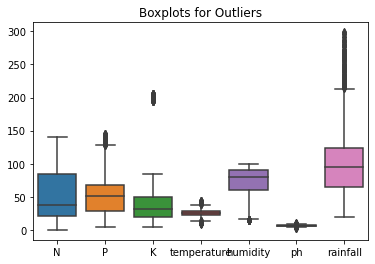

In [ ]:
# Check for outliers using box plots or other visualizations
sns.boxplot(data=df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']])
plt.title('Boxplots for Outliers')
plt.show()

In [ ]:
# Handle outliers (replace with mean, median, or other strategies)
# You can use techniques like winsorization or Z-score normalization.
from scipy.stats import zscore

z_scores = zscore(df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']])
df_no_outliers = df[(z_scores < 3).all(axis=1)]  # Remove rows with outliers

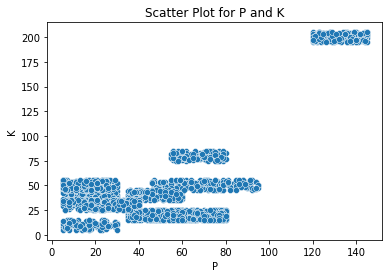

In [ ]:
# Scatter plot for 'P' and 'K'
sns.scatterplot(x='P', y='K', data=df)
plt.title('Scatter Plot for P and K')
plt.show()

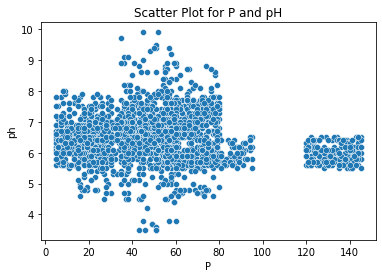

In [ ]:
# Scatter plot for 'P' and 'ph'
sns.scatterplot(x='P', y='ph', data=df)
plt.title('Scatter Plot for P and pH')
plt.show()

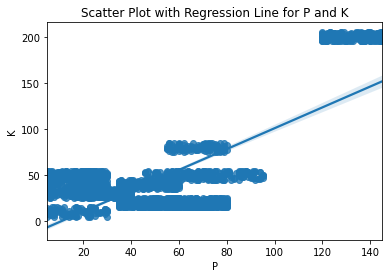

In [ ]:
# Scatter plot with regression line for 'P' and 'K'
sns.regplot(x='P', y='K', data=df)
plt.title('Scatter Plot with Regression Line for P and K')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming the dataset is stored in a DataFrame named 'df'
# Replace 'df' with your actual DataFrame

# Identify features (correlated variables) and the target variable
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
target = 'Crops'

# Create the feature matrix (X) and target variable (y)
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Model Accuracy: 0.9386363636363636

Confusion Matrix:
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 15  0  0  0  0  0  0  0  2  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0 19  0  0  0  0  0  0  0  0  2  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 10  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  4  0  1  0  0 15  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0 21  1  0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Visualize predicted vs. actual crop classes for a subset of instances
subset_size = 20  # Adjust as needed
subset_predictions = pd.DataFrame({'Actual': y_test[:subset_size], 'Predicted': y_pred[:subset_size]})
print("\nSubset of Actual vs. Predicted Crop Classes:")
print(subset_predictions)


Subset of Actual vs. Predicted Crop Classes:
           Actual    Predicted
1451    muskmelon    muskmelon
1334   watermelon   watermelon
1761       papaya       papaya
1735       papaya       papaya
1576        apple        apple
1110        mango        mango
1594        apple        apple
530     mothbeans       papaya
651      mungbean     mungbean
819        lentil       lentil
771     blackgram    blackgram
1878      coconut      coconut
915   pomegranate  pomegranate
2015         jute         jute
1876      coconut      coconut
937   pomegranate  pomegranate
1562        apple        apple
179         maize       cotton
1723       papaya       papaya
1472    muskmelon    muskmelon


Accuracy: 0.9931818181818182
Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00     

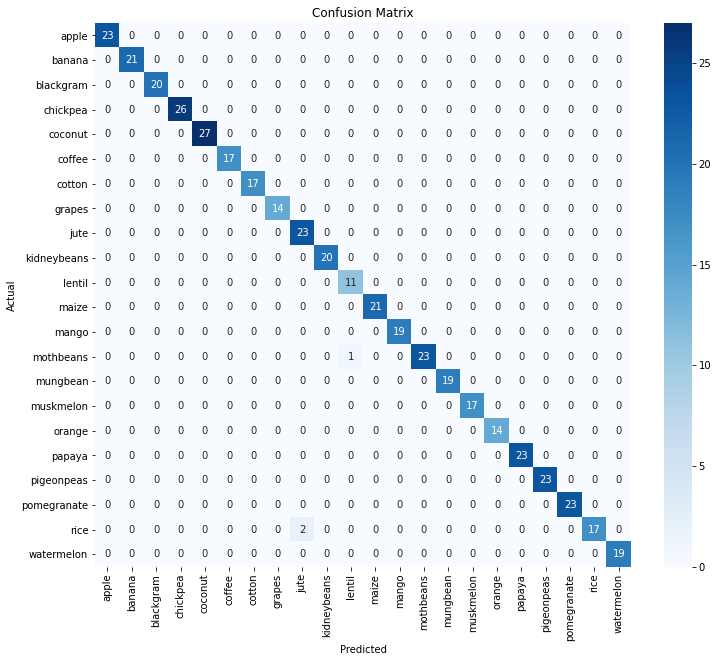

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the dataset
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['Crops']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame with the dataset
label_encoder = LabelEncoder()

# Apply label encoding to the 'Crops' column
df['Crops_encoded'] = label_encoder.fit_transform(df['Crops'])

In [ ]:
# Assuming 'df' is your DataFrame with the dataset
# Use pandas get_dummies function for one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Crops'], prefix='Crop')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'df' is your DataFrame with the dataset
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df_encoded  # Replace with the actual variable representing ideal conditions

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))


Mean Absolute Error: 0.5225893181818181
Mean Squared Error: 2.2708110408333324
R-squared: 0.942472543197827


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming df is your DataFrame with the dataset
X = df.drop('Crops', axis=1)  # Features
y = df['Crops']  # Target variable

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.99



Crop: rice
Mean Absolute Error: 2.63
Mean Squared Error: 9.49
R-squared: 0.97

Crop: maize
Mean Absolute Error: 2.26
Mean Squared Error: 7.04
R-squared: 0.89

Crop: chickpea
Mean Absolute Error: 1.79
Mean Squared Error: 5.18
R-squared: 0.71

Crop: kidneybeans
Mean Absolute Error: 1.69
Mean Squared Error: 4.30
R-squared: 0.96

Crop: pigeonpeas
Mean Absolute Error: 2.79
Mean Squared Error: 13.36
R-squared: 0.94

Crop: mothbeans
Mean Absolute Error: 1.75
Mean Squared Error: 6.42
R-squared: 0.84

Crop: mungbean
Mean Absolute Error: 1.40
Mean Squared Error: 2.99
R-squared: 0.83

Crop: blackgram
Mean Absolute Error: 1.16
Mean Squared Error: 1.98
R-squared: 0.81

Crop: lentil
Mean Absolute Error: 1.66
Mean Squared Error: 4.09
R-squared: 0.77

Crop: pomegranate
Mean Absolute Error: 0.97
Mean Squared Error: 1.27
R-squared: 0.87

Crop: banana
Mean Absolute Error: 1.93
Mean Squared Error: 5.89
R-squared: 0.77

Crop: mango
Mean Absolute Error: 1.72
Mean Squared Error: 4.77
R-squared: 0.73

Crop: 

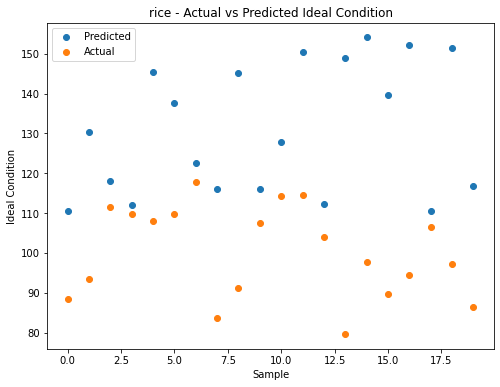

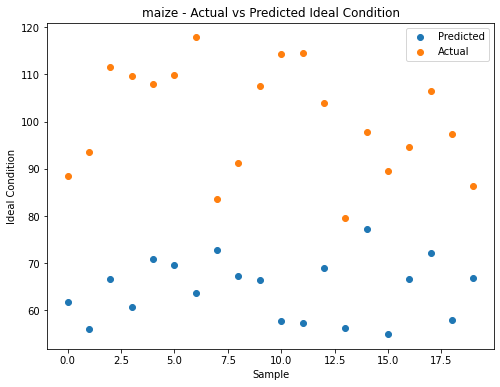

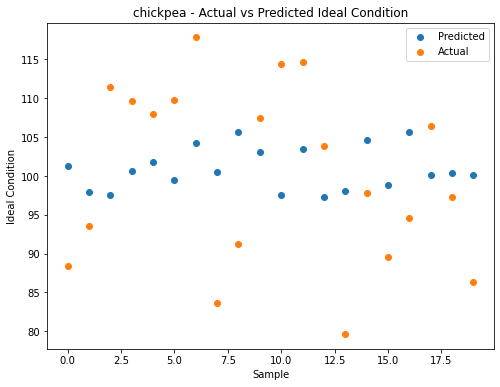

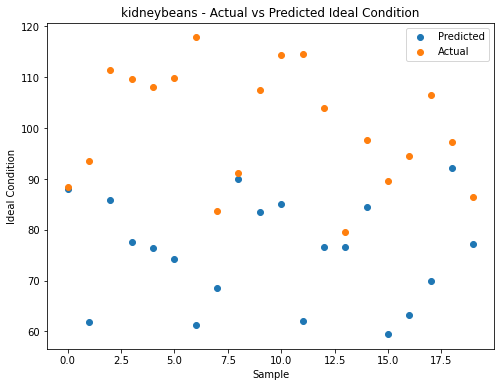

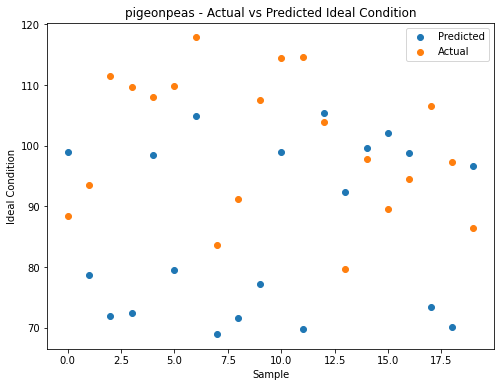

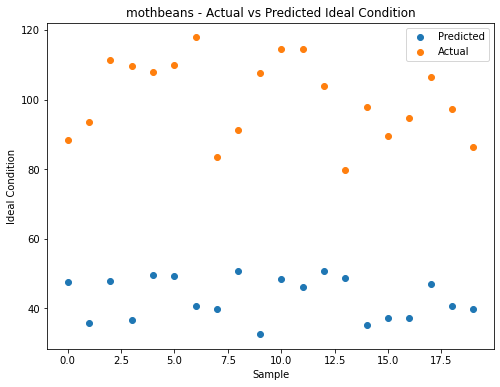

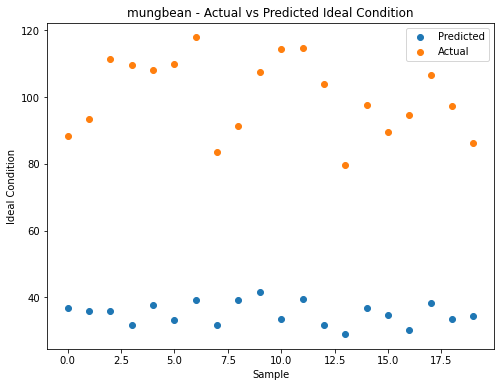

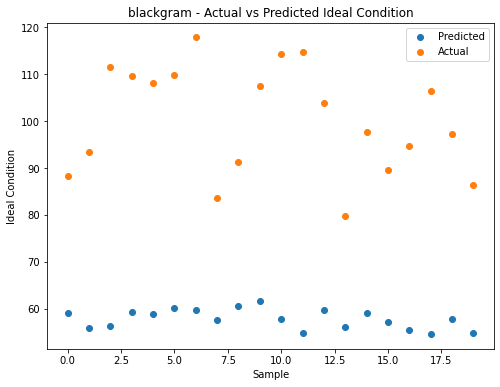

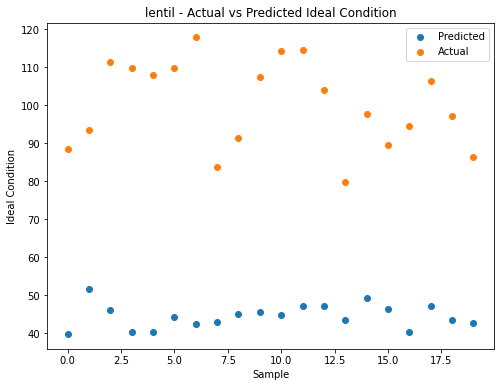

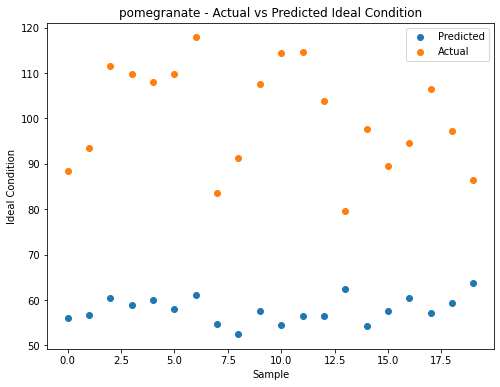

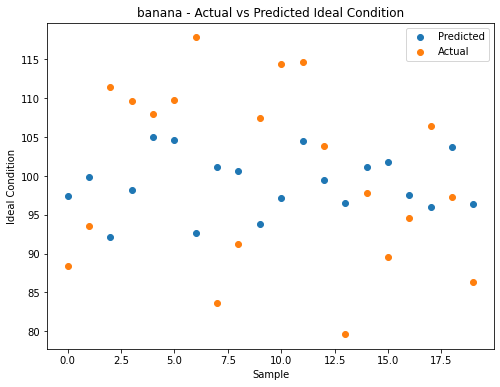

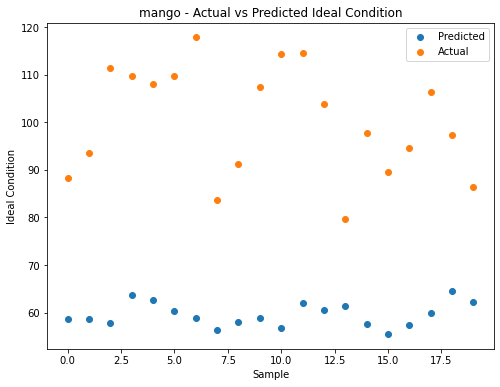

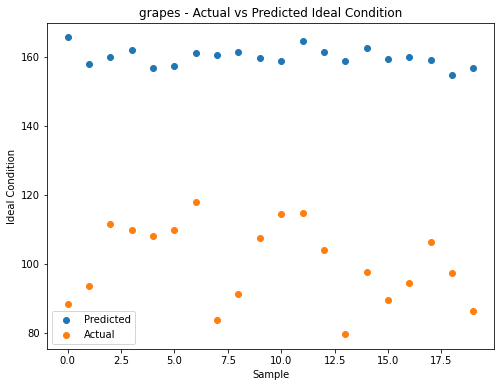

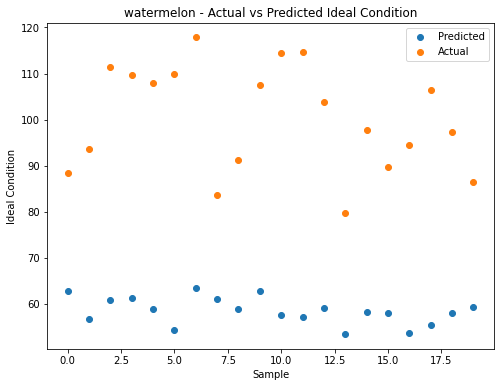

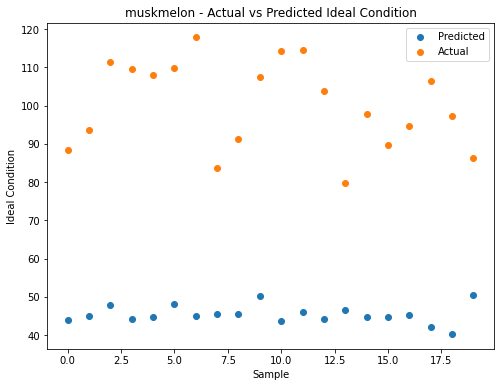

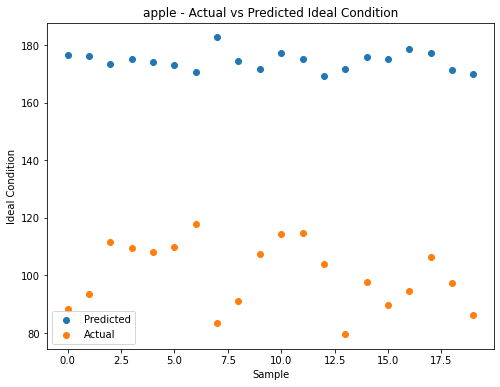

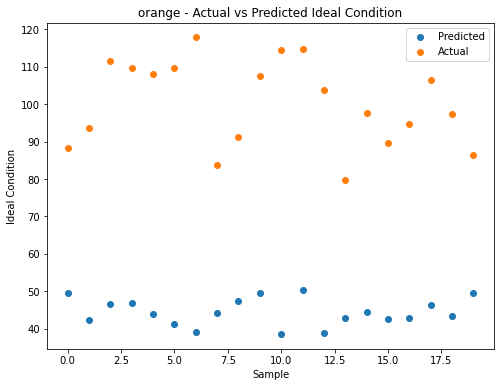

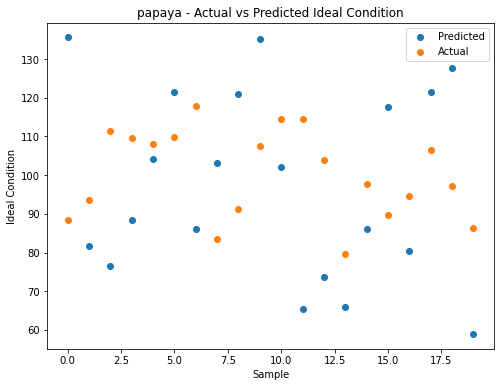

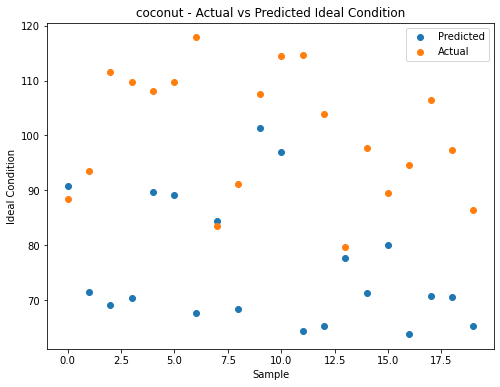

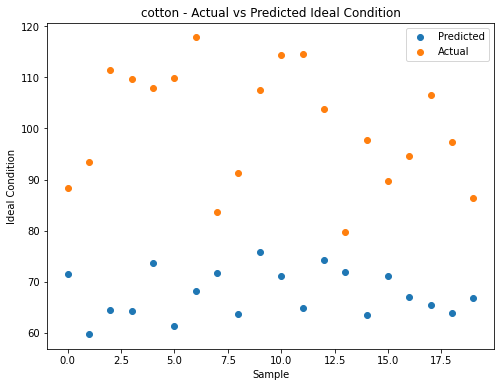

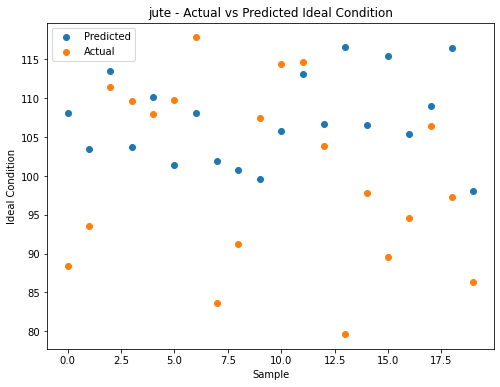

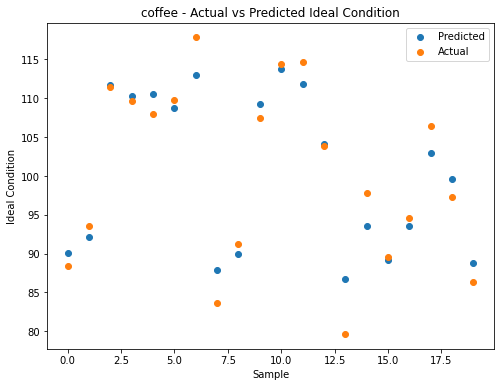

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'df' is your DataFrame with the dataset
# Assuming 'Crops' is the column containing crop names, and other columns are features

# Create a synthetic target variable 'IdealCondition' for each crop based on logical criteria
df['IdealCondition'] = (
    0.2 * df['N'] + 0.3 * df['P'] + 0.5 * df['K'] +
    0.1 * df['temperature'] - 0.2 * df['humidity'] +
    0.3 * df['ph'] + 0.4 * df['rainfall']
)

# List of unique crops in the dataset
unique_crops = df['Crops'].unique()

# Dictionary to store models and predictions for each crop
crop_models = {}
crop_predictions = {}

# Loop through each crop
for crop in unique_crops:
    # Subset the data for the current crop
    crop_data = df[df['Crops'] == crop]

    # Features and target variable
    X = crop_data.drop(['Crops', 'IdealCondition'], axis=1)
    y = crop_data['IdealCondition']

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the model and predictions in the dictionaries
    crop_models[crop] = model
    crop_predictions[crop] = y_pred

    # Print evaluation metrics for each crop
    print(f"\nCrop: {crop}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")

# Visualize predictions for each crop
for crop, predictions in crop_predictions.items():
    plt.figure(figsize=(8, 6))
    plt.scatter(range(len(predictions)), predictions, label='Predicted')
    plt.scatter(range(len(predictions)), y_test, label='Actual')
    plt.title(f'{crop} - Actual vs Predicted Ideal Condition')
    plt.xlabel('Sample')
    plt.ylabel('Ideal Condition')
    plt.legend()
    plt.show()
